#Open Pose 사용 코드 템플릿

In [1]:
!git clone https://github.com/dhrim/Open-Pose-Keras
%cd Open-Pose-Keras
!pip install configobj

Cloning into 'Open-Pose-Keras'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 418 (delta 11), reused 21 (delta 11), pack-reused 397
Receiving objects: 100% (418/418), 29.70 MiB | 32.08 MiB/s, done.
Resolving deltas: 100% (236/236), done.
/content/Open-Pose-Keras
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=43f6548e98ab73d4a600f5fa0e2709be7d69825aaf437b36ed6259153d8eff73
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### 데이터

In [3]:
!cp /gdrive/MyDrive/PROJECT/DATA/5/good/2/*.jpg ./

In [4]:
#!ls -al *.jpg

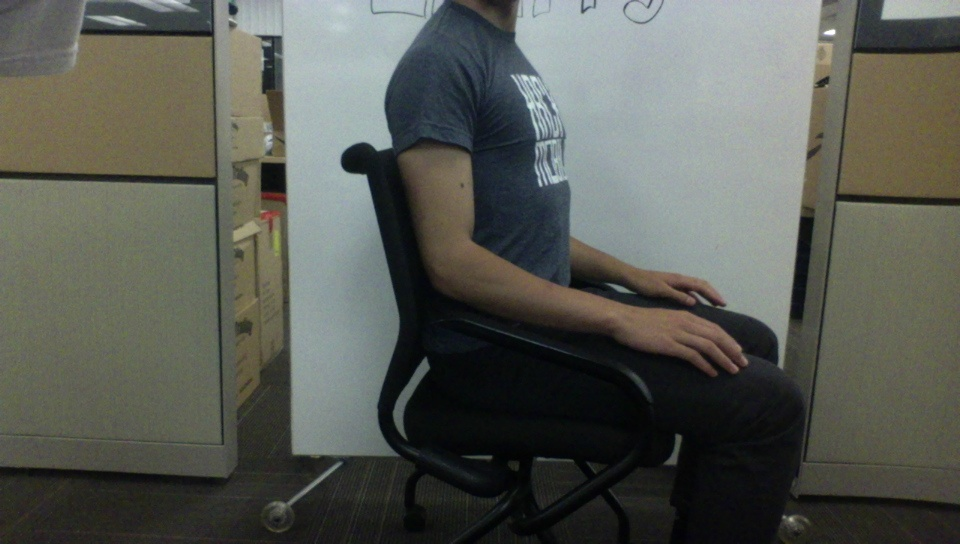

In [5]:
from IPython.display import Image, display
display(Image('128.jpg'))

##모델 로딩 / 포즈 추출 시행

In [6]:
from open_pose_wrapper import OpenPoseWrapper
model = OpenPoseWrapper()

Downloading...
From: https://drive.google.com/uc?id=1d9HGnnLhq6IhC5ZSVpBf7bSrpjNj5kPB
To: /content/Open-Pose-Keras/open_pose_model.h5
100%|██████████| 210M/210M [00:05<00:00, 38.6MB/s]


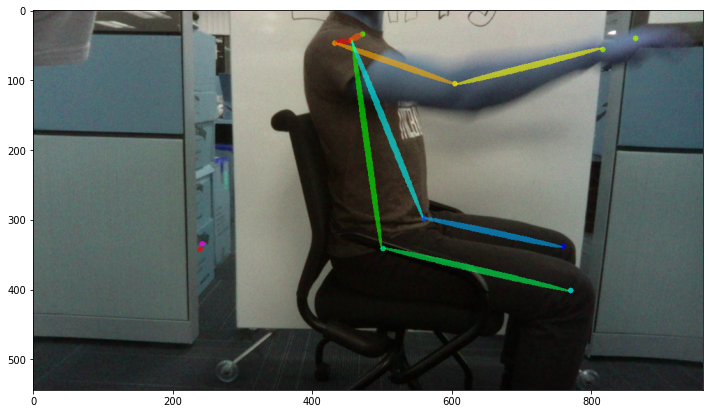

In [7]:
file_name = "111.jpg"
all_peaks, subset, candidate = model.extract(file_name)
model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)

##추출 결과 / all_peak와 subset에 그 결과가 담긴다.
- all_peaks : 추출된 모든 포인트의 정보[18개]
- subset : 사람 별로 추출된 포인트의 정보[19개]

18개 부위를 추출한다.
각 부위의 이름은 config.py에 정의되어 있다.
```
part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
```

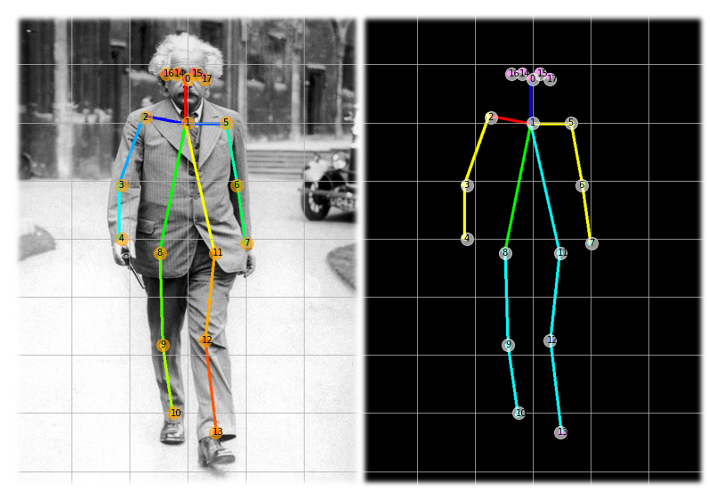

In [8]:
#about allpeak
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])

[nose :  [(239, 342, 0.13663318437465932, 0)]
neck :  [(455, 43, 0.32316218689084053, 1)]
Rsho :  [(432, 47, 0.396065142005682, 2)]
Relb :  [(604, 105, 0.31366034282837063, 3)]
Rwri :  [(863, 40, 0.14290778525173664, 4), (816, 56, 0.21255434025079012, 5)]
Lsho :  [(472, 34, 0.15996955195441842, 6)]
Lelb :  []
Lwri :  []
Rhip :  [(501, 341, 0.16389698383864015, 7)]
Rkne :  [(770, 401, 0.347677229452529, 8)]
Rank :  []
Lhip :  [(560, 298, 0.23105552978813648, 9)]
Lkne :  [(759, 338, 0.4468633085489273, 10)]
Lank :  []
Leye :  []
Reye :  [(242, 334, 0.15190985807385005, 11)]
Lear :  []
Rear :  []


https://vg-rlo.tistory.com/73

In [36]:
print(type((all_peaks[0][0])))
print(all_peaks[0][0])
print(all_peaks[0][0][0],":",all_peaks[0][0][1])
print(all_peaks[3][0][0])

def flatten(lst):#list데이터 추출
    result = []
    rs=0
    for i in range(18):
        item = []
        if(len(all_peaks[i])==0):
          item.append(i)#지정이 안될 경우
          item.append(0)
          item.append(0)
          #print("str",float(str(0.)+str(i)))#소수점 부분 수정하기
          rs+=float(str(0.)+str(i))
        else:
          #item.append(all_peaks[i][0][3])
          item.append(i)
          item.append(all_peaks[i][0][0])
          item.append(all_peaks[i][0][1])
          rs+=float(str(0.)+str(i))+all_peaks[i][0][0]+all_peaks[i][0][1]
        print(part_str[i],"/rs",rs,"AP->",item)
        result.append(item)
    return result
peaks=flatten(all_peaks)
print(peaks)

<class 'tuple'>
(239, 342, 0.13663318437465932, 0)
239 : 342
604
[nose /rs 581.0 AP-> [0, 239, 342]
neck /rs 1079.01 AP-> [1, 455, 43]
Rsho /rs 1558.03 AP-> [2, 432, 47]
Relb /rs 2267.06 AP-> [3, 604, 105]
Rwri /rs 3170.1 AP-> [4, 863, 40]
Lsho /rs 3676.15 AP-> [5, 472, 34]
Lelb /rs 3676.21 AP-> [6, 0, 0]
Lwri /rs 3676.28 AP-> [7, 0, 0]
Rhip /rs 4518.360000000001 AP-> [8, 501, 341]
Rkne /rs 5689.450000000001 AP-> [9, 770, 401]
Rank /rs 5689.460000000001 AP-> [10, 0, 0]
Lhip /rs 6547.471000000001 AP-> [11, 560, 298]
Lkne /rs 7644.483000000001 AP-> [12, 759, 338]
Lank /rs 7644.496000000001 AP-> [13, 0, 0]
Leye /rs 7644.510000000001 AP-> [14, 0, 0]
Reye /rs 8220.525000000001 AP-> [15, 242, 334]
Lear /rs 8220.541000000001 AP-> [16, 0, 0]
Rear /rs 8220.558 AP-> [17, 0, 0]
[[0, 239, 342], [1, 455, 43], [2, 432, 47], [3, 604, 105], [4, 863, 40], [5, 472, 34], [6, 0, 0], [7, 0, 0], [8, 501, 341], [9, 770, 401], [10, 0, 0], [11, 560, 298], [12, 759, 338], [13, 0, 0], [14, 0, 0], [15, 242, 334],

In [10]:
#about subset
print(subset[0])
print(len(subset[0]))#20
print(subset[0][0])

[-1.          1.          2.          3.          5.          6.
 -1.         -1.          7.          8.         -1.          9.
 10.         -1.         -1.         -1.         -1.         -1.
  5.70517373  9.        ]
20
-1.0


###각 포인트별 연결 가능 여부는 limSeq에 담겨 있다
'''
1: nose
2: neck
3: Rsho
4: Relb
5: Rwri
'''

In [11]:
from open_pose_wrapper import limbSeq

print(len(limbSeq))
print(limbSeq)

19
[[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], [1, 16], [16, 18], [3, 17], [6, 18]]


#CallBack

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import Callback,ModelCheckpoint

import time

model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')
"""
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
history = model.fit(train_x, train_y, epochs=300, batch_size=128, verbose=0, validation_split=0.2,
                         callbacks=[model_check_point])
"""

model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
#history = model.fit(np.array([all_peaks[0][0][0],all_peaks[0][0][1]]),subset[0], epochs=10, batch_size=128, verbose=0,callbacks=[model_check_point])
history = model.fit(peaks,subset[0][0], epochs=10, batch_size=128, verbose=0,callbacks=[model_check_point])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

ValueError: ignored

#YOLO를 인식

In [ ]:
!git clone https://github.com/dhrim/darkeras-yolov4

In [ ]:
%cd darkeras-yolov4

In [ ]:
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights

##모델 로딩

In [ ]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("weights/yolov3.weights")

In [ ]:
model.save("yolov3.h5")#

##이미지 로딩

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT_SIZE = 608
"""
image_path = "./docs/kite.jpg"
image      = cv2.imread(image_path)
image      = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
"""
image_path = "/gdrive/MyDrive/PROJECT/DATA/5/good/2/100.jpg"
image      = cv2.imread(image_path)
image      = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(image)
plt.show()

##탐지 실행

In [ ]:
bboxes = model.predict(image)#keras코드에서 boundary box로 bounding 됨

print(len(bboxes))#갯수
print(bboxes)#카테고리 인덱스

In [ ]:
dummy = np.copy(image)

for box in bboxes:
    
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    conf = box[4]
    cls_id = int(box[5])
        
    dummy = cv2.rectangle(dummy, (x1,y1), (x2,y2), (255,0,0), 2)#빨간색, 선의 두께는 2
     
plt.figure(figsize=(12,10))
plt.gca().set_title("yolov3"), plt.imshow(dummy)
plt.show()

##박스 네이밍

In [ ]:
import core
import colorsys
import random

def draw_bbox(image, bboxes, show_label=True):
    """
    bboxes: [x_min, y_min, x_max, y_max, probability, cls_id] format coordinates.
    """

    try:
        classes = class_names
    except NameError:
        classes = core.utils.read_class_names("./data/classes/coco.names")

    num_classes = len(classes)
    image_h, image_w, _ = image.shape
    hsv_tuples = [(1.0 * x / num_classes, 1., 1.) for x in range(num_classes)]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))

    random.seed(0)
    random.shuffle(colors)
    random.seed(None)

    for i, bbox in enumerate(bboxes):
        coor = np.array(bbox[:4], dtype=np.int32)
        fontScale = 0.5
        score = bbox[4]
        class_ind = int(bbox[5])
        bbox_color = colors[class_ind]
        bbox_thick = int(0.6 * (image_h + image_w) / 600)
        c1, c2 = (coor[0], coor[1]), (coor[2], coor[3])
        cv2.rectangle(image, c1, c2, bbox_color, bbox_thick)

        if show_label:
            bbox_mess = '%s: %.2f' % (classes[class_ind], score)
            t_size = cv2.getTextSize(bbox_mess, 0, fontScale, thickness=bbox_thick//2)[0]
            cv2.rectangle(image, c1, (c1[0] + t_size[0], c1[1] - t_size[1] - 3), bbox_color, -1)  # filled#labeling2

            cv2.putText(image, bbox_mess, (c1[0], c1[1]-2), cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale, (0, 0, 0), bbox_thick//2, lineType=cv2.LINE_AA)#labeling2

    return image

In [ ]:
image = draw_bbox(image, bboxes)

plt.figure(figsize=(12,10))
plt.imshow(image)
plt.show()

In [ ]:
cv2.imwrite("/gdrive/MyDrive/tmp/detections_yolov3.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))